# <center> Housing Price Timeline</center>

In [2]:
import pandas as pd #datastructure &tools
#scipy functions & datavisualization
#visualization libraries
#matplotlib , seaborn
import matplotlib.pyplot as plt 
#algorithm libraries
#scikit-learn - regression
#statsmodels

In [3]:
from datetime import datetime

In [4]:
#Download the path monthly
csv_path = "Zip_Zhvi_AllHomes.csv"
df = pd.read_csv(csv_path) # df = data frame
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,222928.0,...,1247957.0,1237765.0,1217910.0,1202019.0,1187806.0,1181753.0,1175189.0,1152836.0,1122702.0,1085142.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,210254.0,...,491901.0,492090.0,491467.0,490569.0,489634.0,488733.0,488090.0,488145.0,489488.0,491246.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,249810.0,...,1202909.0,1200070.0,1192096.0,1176335.0,1166441.0,1168883.0,1188089.0,1207863.0,1221435.0,1221711.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200343.0,...,335353.0,335695.0,335756.0,335907.0,335933.0,335897.0,335966.0,335670.0,335844.0,336286.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,284417.0,...,643892.0,643827.0,643100.0,641800.0,640753.0,639321.0,637969.0,637587.0,637683.0,638027.0


In [5]:
cal_prices = df.loc[df["State"] == 'CA']

In [6]:
cv_city_names = ("Cathedral City", "Indio", "La Quinta", "Desert Hot Springs", "Rancho Mirage", "Thousand Palms", "Palm Desert","Palm Springs","Indian Wells")  
cv_prices = cal_prices[cal_prices.City.str.contains('|'.join(cv_city_names))]
cv_prices = cv_prices.loc[691:24119, 'RegionName':'2020-03-31']
cv_prices = cv_prices.reset_index(drop=True)

In [7]:
dates = cv_prices.columns[7:].to_list()#MAybe not needed
zip_codes = cv_prices['RegionName'].to_list()
city_names = cv_prices['City'].to_list()
merg_list = zip (zip_codes, city_names)
loc_dict = dict(merg_list)
cv_prices = cv_prices.drop(columns=['RegionType','StateName','State','Metro','CountyName','City'])

In [8]:
cv_prices.dtypes
cv_prices.describe()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
count,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,92240.384615,153763.250000,153054.250000,152512.416667,151453.583333,150653.916667,150141.833333,149721.333333,149644.416667,149477.416667,...,377969.384615,379879.230769,382078.461538,383766.076923,385415.000000,386101.000000,387878.230769,388197.461538,389037.076923,389470.923077
std,26.600559,81128.211949,80322.398827,79814.617362,78988.848828,78640.455272,78541.105165,78516.768766,78713.466104,78829.524219,...,139846.074042,139917.641550,140042.069126,139912.474467,140061.602821,139762.914734,139987.849224,139313.175858,138815.572590,137920.066476
min,92201.000000,65985.000000,66171.000000,66446.000000,66915.000000,67213.000000,67607.000000,67867.000000,68421.000000,68661.000000,...,225416.000000,226294.000000,227500.000000,228569.000000,230247.000000,231383.000000,233175.000000,233997.000000,234994.000000,235903.000000
25%,92211.000000,99809.500000,99355.250000,98999.250000,98315.500000,97849.750000,97408.750000,96851.000000,96560.500000,96337.250000,...,288148.000000,289660.000000,291245.000000,292372.000000,294034.000000,294849.000000,296608.000000,297038.000000,297854.000000,298335.000000
50%,92241.000000,134432.500000,133796.000000,133229.500000,132303.000000,131574.000000,130969.500000,130304.000000,129977.000000,129781.000000,...,359666.000000,360956.000000,362386.000000,363433.000000,364979.000000,365636.000000,367278.000000,367310.000000,367601.000000,367347.000000
75%,92262.000000,177898.750000,177203.750000,176714.750000,175720.000000,175007.000000,174447.250000,173918.750000,173787.000000,173786.750000,...,441051.000000,444458.000000,448377.000000,451490.000000,452700.000000,452644.000000,454034.000000,454391.000000,455053.000000,455309.000000
max,92276.000000,354735.000000,351708.000000,349705.000000,346214.000000,344183.000000,343442.000000,343096.000000,343905.000000,344010.000000,...,739622.000000,741774.000000,744337.000000,745797.000000,747972.000000,747834.000000,749943.000000,748334.000000,747902.000000,745907.000000


In [9]:
cv_format = cv_prices.T
new_headers = cv_format.iloc[0]
cv_format = cv_format[1:]
cv_format.columns = new_headers
cv_format

RegionName,92201.0,92253.0,92234.0,92260.0,92211.0,92262.0,92240.0,92264.0,92203.0,92270.0,92241.0,92210.0,92276.0
1996-01-31,102880.0,197083.0,101030.0,150643.0,171504.0,96148.0,NaN,118222.0,162244.0,239583.0,85102.0,354735.0,65985.0
1996-02-29,102544.0,196220.0,100586.0,150059.0,170865.0,95663.0,NaN,117533.0,161416.0,238361.0,85525.0,351708.0,66171.0
1996-03-31,102490.0,195800.0,100246.0,149457.0,170353.0,95259.0,NaN,117002.0,161185.0,237210.0,84996.0,349705.0,66446.0
1996-04-30,102210.0,194875.0,99647.0,148371.0,169335.0,94321.0,NaN,116235.0,160142.0,235475.0,83703.0,346214.0,66915.0
1996-05-31,102043.0,194393.0,99285.0,147414.0,168545.0,93544.0,NaN,115734.0,159918.0,234265.0,81310.0,344183.0,67213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,294849.0,457676.0,323437.0,372499.0,355816.0,452644.0,231383.0,395258.0,365636.0,522758.0,236456.0,747834.0,263067.0
2019-12-31,296608.0,459991.0,325611.0,373921.0,357652.0,454034.0,233175.0,396512.0,367278.0,525516.0,237372.0,749943.0,264804.0
2020-01-31,297038.0,459957.0,326141.0,373908.0,357584.0,454391.0,233997.0,396894.0,367310.0,525816.0,239118.0,748334.0,266079.0
2020-02-29,297854.0,460724.0,327255.0,374336.0,358000.0,455053.0,234994.0,397565.0,367601.0,526683.0,241059.0,747902.0,268456.0


In [10]:
a =cv_format.index.values
x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in a]

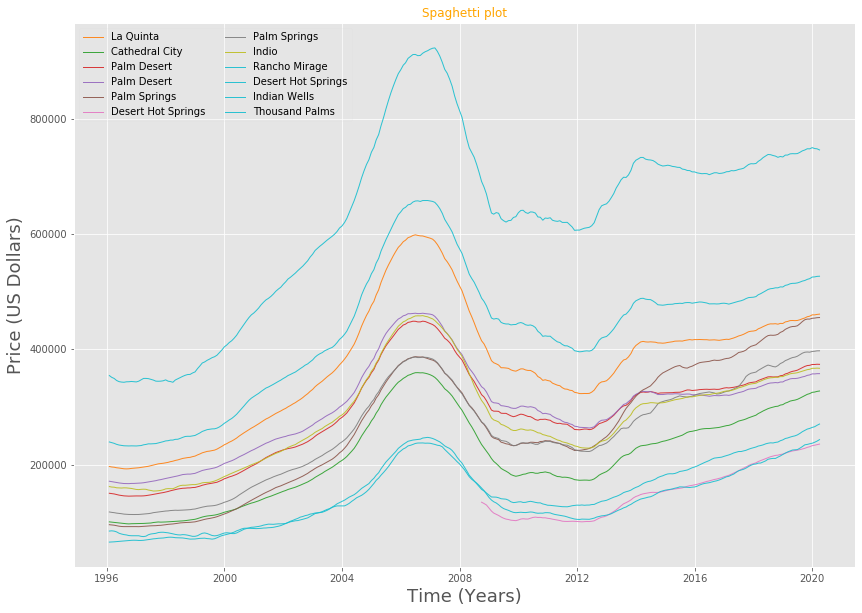

In [13]:
# style
plt.style.use('ggplot')
#print(plt.style.available)
#Refernce: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
    
# create a color palette
palette = plt.get_cmap('tab10')
#https://matplotlib.org/tutorials/colors/colormaps.html
    
# multiple line plot
num=0
plt.rcParams['figure.figsize'] = [14, 10]
for column in cv_format.drop(92201.0, axis=1):
    num+=1
    plt.plot(x_values, cv_format[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=loc_dict[column])
    
# Add legend
plt.legend(loc=2, ncol=2,framealpha=0.1)
 
# Add titles
plt.title("Spaghetti plot", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time (Years)",fontsize=18)
plt.ylabel("Price (US Dollars)",fontsize=18)
plt.show()

La Quinta
Cathedral City
Palm Desert
Palm Desert
Palm Springs
Desert Hot Springs
Palm Springs
Indio
Rancho Mirage
Desert Hot Springs
Indian Wells
Thousand Palms


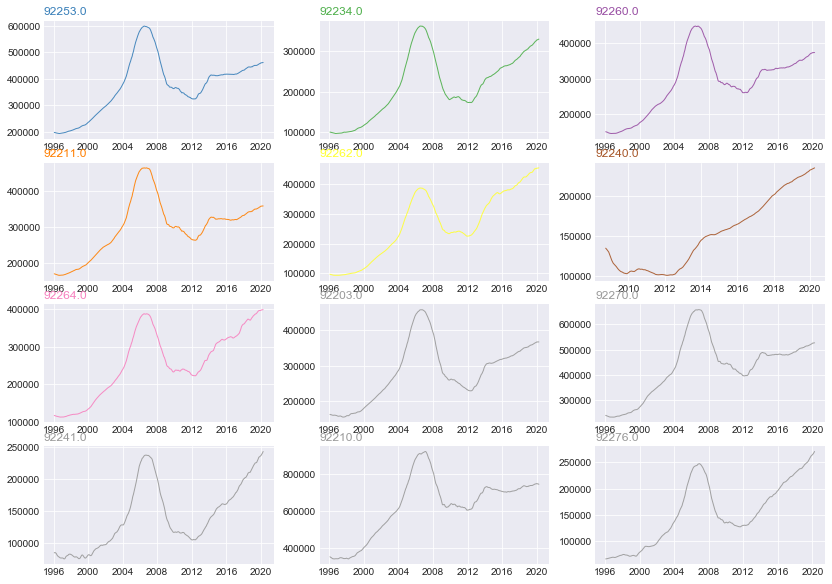

In [21]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in cv_format.drop(92201.0, axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,3, num)
 
    # Plot the lineplot
    #plt.plot(x_values, cv_format[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    plt.plot(x_values, cv_format[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=loc_dict[column])
    print(loc_dict[column])
        
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-2,22)
 
    # Not ticks everywhere
    """
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
     """ 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
#plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

In [ ]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in cv_format.drop(92201.0, axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,4, num)
 
    # plot every groups, but discreet
    for v in cv_format.drop(92201.0, axis=1):
        plt.plot(x_values, cv_format[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(x_values, cv_format[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=loc_dict[column])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-2,22)
 
    # Not ticks everywhere
    """
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
     
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
"""

In [ ]:
#multiple linear regresion to get above predictor 


#Make a Dashboard

In [ ]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    #output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend="% GDP change")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend="% unemployed")
    show(p)

## By Knowing certain features I can predict price range of house
use a linear model 

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

In [ ]:
for column in df.drop('bar', axis=1):
    print(column)

In [ ]:
a = df.iloc[:,0].to_list()
type(a[0])

In [ ]:
a =(df.index.values)
type(a[0])

In [ ]:
Row_list =[] 
  
# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    print(rows[1:])
    my_list =[rows.foo,rows.bar] 
      
    # append the list to the final list 
    Row_list.append(my_list) 
  
# Print the list 
print(Row_list) 

# Work with the dataset
https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices

https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1


#Data Resources
- Datasets 
    * http://www.mls.com/Search/California.mvc
    * http://www.desertmlssearch.com/
    *
    
- Scraping data 
    * https://towardsdatascience.com/looking-for-a-house-build-a-web-scraper-to-help-you-5ab25badc83e
    
    * https://www.scrapehero.com/how-to-scrape-real-estate-listings-on-zillow-com-using-python-and-lxml/
    
    * https://www.palmspringsluxuryrealty.com/homes-for-sale-results/?cityId%5B%5D=73&cityId%5B%5D=401&cityId%5B%5D=402&cityId%5B%5D=444&cityId%5B%5D=674&cityId%5B%5D=675&cityId%5B%5D=752&propertyType=SFR&cityId%5B%5D=&bedrooms=0&bathCount=0&minListPrice=&maxListPrice=
    
    * http://www.palmspringsrealestates.com/home-search/desert-area-mls-search/
    
    * https://realpython.com/beautiful-soup-web-scraper-python/ 
   * https://my.flexmls.com/palmspringspalmdesert/search/idx_links/20190529005248336809000000/listings
    * https://www.mlslistings.com/Search/Result/19c56727-caaf-480e-aa79-546518b72758/1
    * https://www.promptcloud.com/blog/scraping-real-estate-data-from-zillow-using-python/
    
 - Housing lookup sites
     *  https://www.realtor.com/realestateandhomes-search/92235?view=map&pos=34.02758,-116.608027,33.570533,-116.182307,11&qdm=true
     * https://www.fortunebuilders.com/real-estate-license/
     


https://www.investopedia.com/terms/m/multiple-listing-service-mls.asp

understanding the housing market
https://www.fortunebuilders.com/comparable-home-sales/
https://www.inman.com/2015/05/04/dont-worry-about-listing-data-its-sold-data-thats-going-to-hurt-you/